## Quarentena de dados - Aula 01


Alguns exemplos e exercicios propostos na Quarentena de dados da Alura/Data Hackers

In [69]:
# Importando classes que serão usadas no notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Informando o jupyter para plotar os gráficos no notebook
%matplotlib inline

In [2]:
# Lendos os arquivos de filmes e notas
df_movies = pd.read_csv("../Aula01/ml-latest-small/movies.csv")
df_ratings = pd.read_csv('../Aula01/ml-latest-small/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# Agrupando por nota média por filme
nota_media_por_filme = df_ratings.groupby(by='movieId')['rating'].mean()
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [4]:
# Fazendo um join das médias com o data frame de filmes
filmes_com_media = df_movies.join(nota_media_por_filme, on="movieId")
filmes_com_media.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [5]:
# Ordernar por rating
filmes_com_media.sort_values(by="rating", ascending=False)

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


### Exercício 1: Mudar o nome da coluna rating por média após o join

In [6]:
# Criando um dataframe filmes_com_medi e renomeando a coluna rating
filmes_com_media = df_movies.join(nota_media_por_filme, on="movieId").rename(columns={'rating': "media"})
filmes_com_media.head()

,movieId,title,genres,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### arredondar média para 2 casas decimais

In [7]:
filmes_com_media['media'] = filmes_com_media['media'].round(2)
filmes_com_media.head()

,movieId,title,genres,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


### Exercício 2: Mostar o número de avaliação de cada filme

In [8]:
numero_avaliacao_por_filme = df_ratings['movieId'].value_counts().rename_axis('movieId')
numero_avaliacao_por_filme

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [9]:
# Fazendo join da tabela de filmes com a quantidade de votos
filmes_com_media_e_qtd_avaliacao = filmes_com_media.join(numero_avaliacao_por_filme, on='movieId',lsuffix='_left', rsuffix='_right')
# Renomeando a nova coluna
filmes_com_media_e_qtd_avaliacao.rename(columns={'movieId_right': 'qtd_votos'}, inplace=True)
# Mudando valores nulos de qtd_votos e media para 0
filmes_com_media_e_qtd_avaliacao.fillna(0, inplace=True)
# Mudando os tipo de dados da quantidade de votos para int
filmes_com_media_e_qtd_avaliacao['qtd_votos'] = filmes_com_media_e_qtd_avaliacao['qtd_votos'].astype(int) 
filmes_com_media_e_qtd_avaliacao.head()

,movieId_left,title,genres,media,qtd_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Exercicio 3: Extraindo a quantidade de gêneros únicos.

In [10]:
filmes_com_media_e_qtd_avaliacao['genres'].str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Listando quantidade de generos únicos
generos = filmes_com_media_e_qtd_avaliacao['genres'].str.get_dummies()
len(generos.columns)

20

### Exercício 4: Quantas vezes determinado gênero aparece

In [13]:
# merge filmes com genero
filmes_generos = pd.concat([filmes_com_media_e_qtd_avaliacao, generos], axis=1)
filmes_generos.head(3)

,movieId_left,title,genres,media,qtd_votos,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
data = dict()
# Criando um dicionario com o genero e a quantidade que aparece
for gen in generos:
    data[gen] = filmes_generos[gen].sum()

# Criando um dataFrame a partir do dicionario
df_genero_quantidade = pd.DataFrame(data = data.items(), columns=['Genero', 'Quantidade'])
df_genero_quantidade.sort_values(by="Quantidade",ascending=False).head(10).reset_index(drop=True)

,Genero,Quantidade
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


### plotar o grafico de aparições por genero

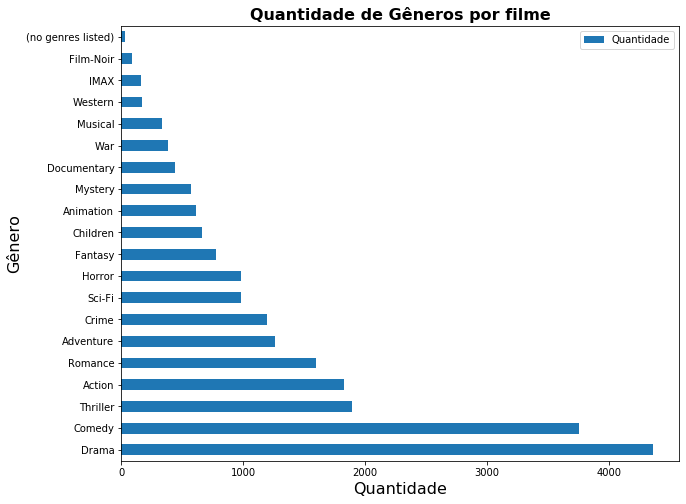

In [15]:
# Posso usar tanto o sort_values quanto o nlargest
df_genero_quantidade.nlargest(df_genero_quantidade.shape[0], 'Quantidade').plot.barh(x='Genero', y='Quantidade',figsize=(10,8))
plt.title("Quantidade de Gêneros por filme", fontdict={"fontweight": "bold", "fontsize":16})
plt.xlabel("Quantidade", fontdict={"fontsize":16})
plt.ylabel("Gênero", fontdict={"fontsize":16})
plt.show()

# Desafios aula 02

### DESAFIO 1 - Rotacionar os ticks(os nomes dos gêneros)

In [31]:
generos.shape[1]

20

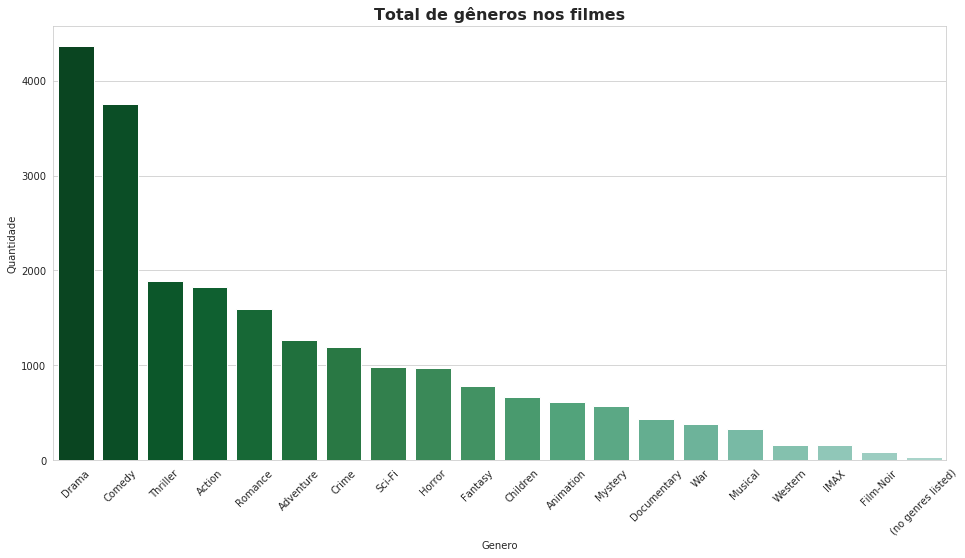

In [70]:
plt.figure(figsize=(16,8))
# Plotando o gráfico
sns.barplot(x="Genero", y="Quantidade", 
                data=df_genero_quantidade.sort_values(by="Quantidade",ascending=False),
           palette=sns.color_palette("BuGn_r", n_colors=30))
# Inserindo titulo no gráfico
plt.title("Total de gêneros nos filmes", fontdict={'fontweight': 'bold', 'fontsize': 16})
# Rotacionando
plt.xticks(rotation=45)
plt.show()

### DESAFIO 2 - Comparar outros filmes com notas próximas e achar distribuições bem diferentes

In [163]:
# Se pegarmos os 10 filmes com mais notas vamos encontrar notas parecidas, vamos verificar a distribuição

# Criando uma váriavel com os 10 filmes mais votados
df_mais_votados = filmes_com_media_e_qtd_avaliacao.sort_values(by="qtd_votos", ascending=False).rename(columns={"movieId_left":'movieId'}).head(10)

In [145]:
# Criando um método que irá plotar o boxplot e o gráfico de distribuição
def boxdist(movieId):
    # Plotando o gráfico
    sns.set_style("whitegrid")
    # Plotar os gráficos um ao lado do outro
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    ax[0].set_title("Boxplot")
    sns.boxplot(y=df_ratings[df_ratings['movieId'] == movieId]['rating'], ax=ax[0])

    ax[1].set_title("Distribuição")
    sns.distplot(df_ratings[df_ratings['movieId'] == movieId]['rating'], kde=False, ax=ax[1] )

    fig.suptitle(df_movies[df_movies['movieId'] == movieId]['title'].to_string(index=False), fontsize=16)
    plt.show()

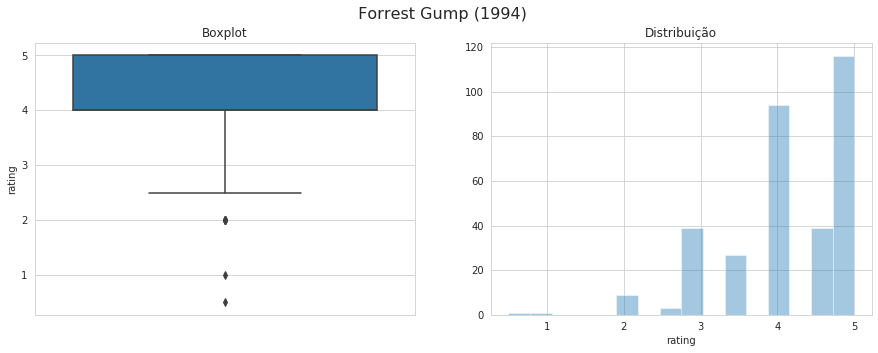

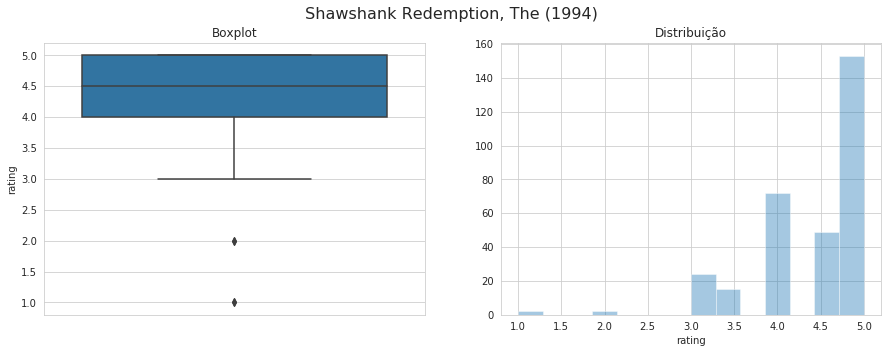

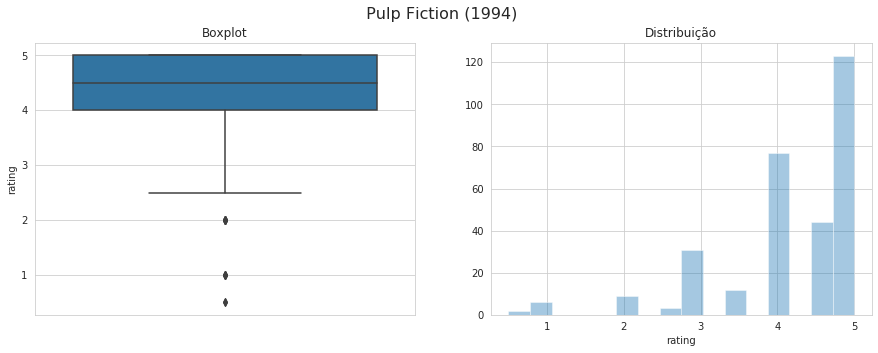

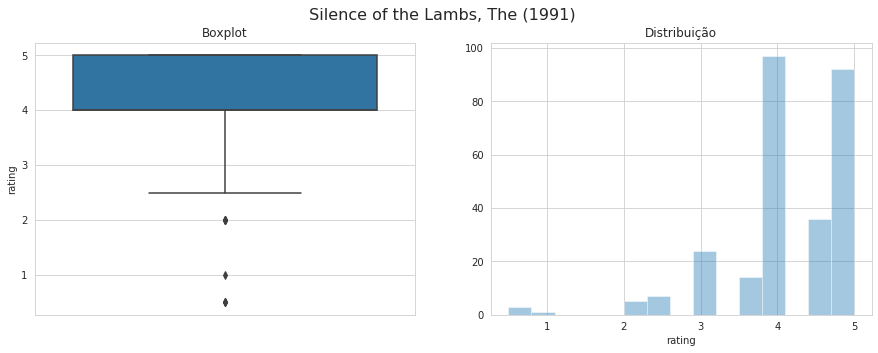

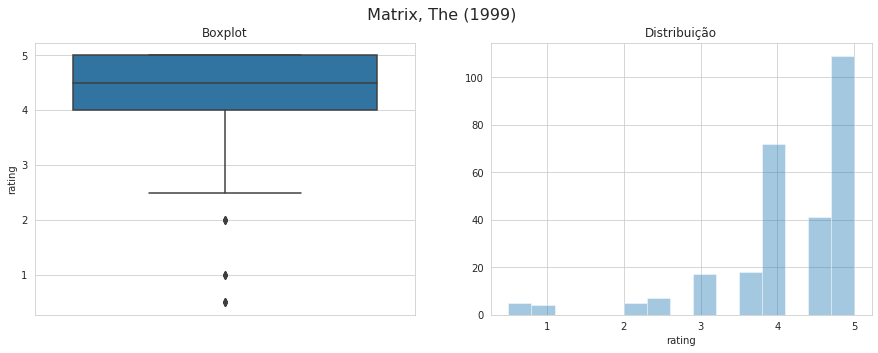

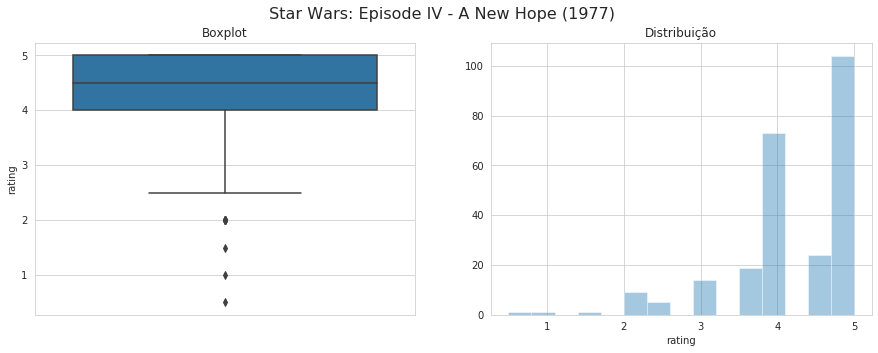

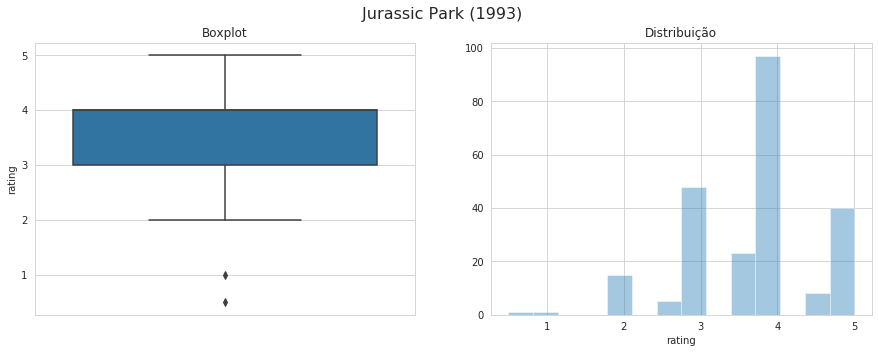

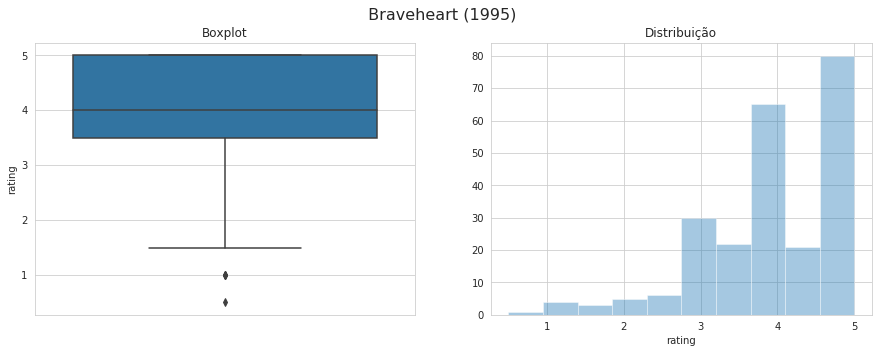

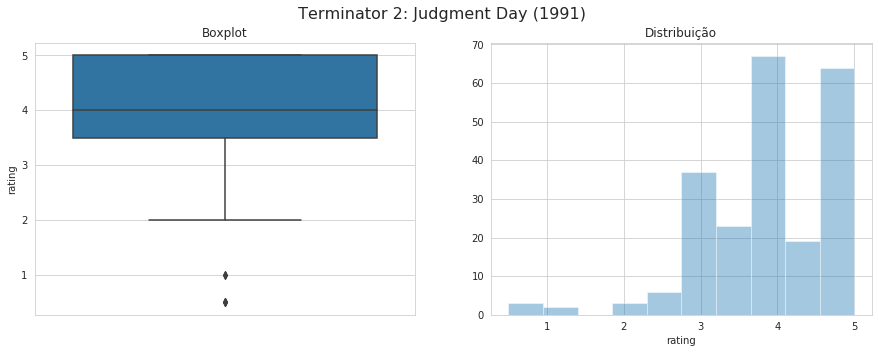

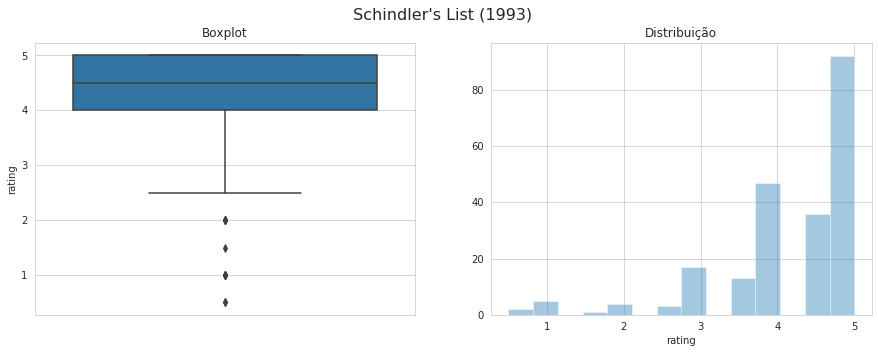

314     None
277     None
257     None
510     None
1939    None
224     None
418     None
97      None
507     None
461     None
Name: movieId, dtype: object

In [162]:
df_mais_votados['movieId'].map(boxdist)

### DESAFIO 3 - Criar o boxplot dos 10 filmes com mais votos(não é com maior média, é com mais votos)

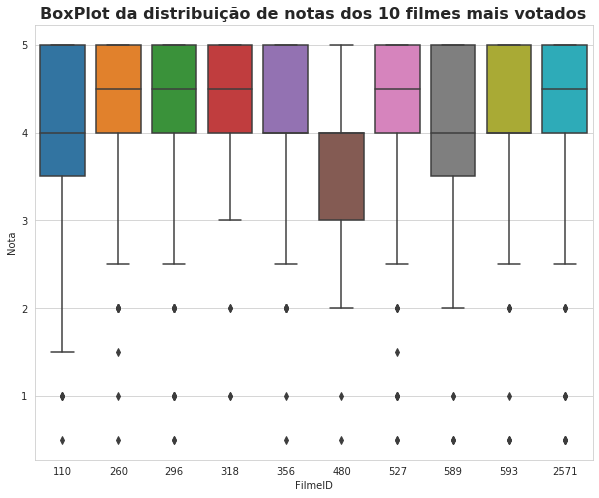

In [216]:
df_ratings_mais_votados = df_ratings.query(f"movieId in {df_mais_votados['movieId'].to_list()}")
plt.figure(figsize=(10,8))

sns.boxplot(x='movieId', y='rating', data=df_ratings_mais_votados)
plt.title("BoxPlot da distribuição de notas dos 10 filmes mais votados", fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xlabel("FilmeID")
plt.ylabel("Nota")
plt.show()

###  Desafio 4 - Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

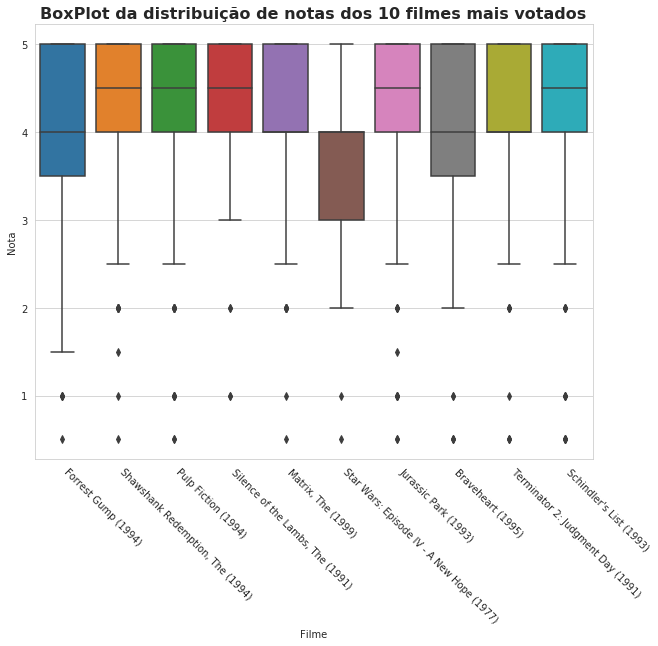

In [217]:
df_ratings_mais_votados = df_ratings.query(f"movieId in {df_mais_votados['movieId'].to_list()}")
plt.figure(figsize=(10,8))

ax = plt.subplot()
sns.boxplot(x='movieId', y='rating', data=df_ratings_mais_votados, ax=ax)
ax.set_xticklabels(df_mais_votados['title'].to_list())
plt.xticks(rotation=-45, horizontalalignment="left")
plt.title("BoxPlot da distribuição de notas dos 10 filmes mais votados", fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xlabel("Filme")
plt.ylabel("Nota")
plt.show()

### Desafio 5 - Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.



In [244]:
def informacoes(movieId):
    print("Filme: ", df_movies[df_movies['movieId'] == movieId]['title'].to_srein)
    print("Média: ", df_ratings[df_ratings['movieId'] == movieId]['rating'].mean()) 
    print("Moda:",df_ratings[df_ratings['movieId'] == movieId]['rating'].median())
    print("Mediana:", df_ratings[df_ratings['movieId'] == movieId]['rating'].mode())
    print()

In [245]:
df_mais_votados['movieId'].map(informacoes)

Filme:  314    Forrest Gump (1994)
Name: title, dtype: object
Média:  4.164133738601824
Moda: 4.0
Mediana: 0    5.0
dtype: float64

Filme:  277    Shawshank Redemption, The (1994)
Name: title, dtype: object
Média:  4.429022082018927
Moda: 4.5
Mediana: 0    5.0
dtype: float64

Filme:  257    Pulp Fiction (1994)
Name: title, dtype: object
Média:  4.197068403908795
Moda: 4.5
Mediana: 0    5.0
dtype: float64

Filme:  510    Silence of the Lambs, The (1991)
Name: title, dtype: object
Média:  4.161290322580645
Moda: 4.0
Mediana: 0    4.0
dtype: float64

Filme:  1939    Matrix, The (1999)
Name: title, dtype: object
Média:  4.192446043165468
Moda: 4.5
Mediana: 0    5.0
dtype: float64

Filme:  224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object
Média:  4.231075697211155
Moda: 4.5
Mediana: 0    5.0
dtype: float64

Filme:  418    Jurassic Park (1993)
Name: title, dtype: object
Média:  3.75
Moda: 4.0
Mediana: 0    4.0
dtype: float64

Filme:  97    Braveheart (1995)
Name: ti

314     None
277     None
257     None
510     None
1939    None
224     None
418     None
97      None
507     None
461     None
Name: movieId, dtype: object